<a href="https://colab.research.google.com/github/alex-kondr/Data_Science_HW_10/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
X_valid, X_train = X_train[:6000] / 255.0, X_train[6000:] / 255.0
y_valid, y_train = y_train[:6000], y_train[6000:]

In [6]:
model = Sequential()

model.add(Conv2D(64,
                 (5, 5),
                 padding="same",
                 activation="relu",
                 input_shape=(28, 28, 1)
                 )
         )

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,
                 (5, 5),
                 padding="same",
                 activation="relu"
                )
         )

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,
                 (5, 5),
                 padding="same",
                 activation="relu"
                )
          )

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(
    X_train,
    y_train,
    epochs=12,
    batch_size=32,
    validation_data=(X_valid, y_valid)
)

Epoch 1/12
1688/1688 [==============================] - 555s 329ms/step - loss: 0.2155 - accuracy: 0.9199 - val_loss: 0.2412 - val_accuracy: 0.9115
Epoch 2/12
1688/1688 [==============================] - 551s 326ms/step - loss: 0.1640 - accuracy: 0.9389 - val_loss: 0.2516 - val_accuracy: 0.9137
Epoch 3/12
1688/1688 [==============================] - 553s 327ms/step - loss: 0.1406 - accuracy: 0.9475 - val_loss: 0.2369 - val_accuracy: 0.9217
Epoch 4/12
1688/1688 [==============================] - 549s 325ms/step - loss: 0.1210 - accuracy: 0.9550 - val_loss: 0.2639 - val_accuracy: 0.9117
Epoch 5/12
1688/1688 [==============================] - 550s 326ms/step - loss: 0.1063 - accuracy: 0.9606 - val_loss: 0.2748 - val_accuracy: 0.9198
Epoch 6/12
1688/1688 [==============================] - 541s 321ms/step - loss: 0.0960 - accuracy: 0.9645 - val_loss: 0.2584 - val_accuracy: 0.9190
Epoch 7/12
1688/1688 [==============================] - 548s 325ms/step - loss: 0.0827 - accuracy: 0.9692 - val_

In [26]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 25s 80ms/step - loss: 85.1665 - accuracy: 0.8703


In [27]:
print(results)

[85.16647338867188, 0.8702999949455261]


In [28]:
print(history.history)

{'loss': [0.21549643576145172, 0.16400694847106934, 0.14058740437030792, 0.12104032188653946, 0.10634784400463104, 0.09595091640949249, 0.08271630853414536, 0.07446688413619995, 0.06749965250492096, 0.06351138651371002, 0.05771486461162567, 0.050576351583004], 'accuracy': [0.9198518395423889, 0.9388518333435059, 0.9474629759788513, 0.9550370573997498, 0.9606481194496155, 0.9645185470581055, 0.9691851735115051, 0.9726296067237854, 0.9744259119033813, 0.9767037034034729, 0.9784073829650879, 0.9814814925193787], 'val_loss': [0.24119316041469574, 0.251574844121933, 0.2368880659341812, 0.2638847529888153, 0.2748258411884308, 0.258431613445282, 0.29430198669433594, 0.288536936044693, 0.3481173813343048, 0.34844979643821716, 0.4140315353870392, 0.3679434359073639], 'val_accuracy': [0.9114999771118164, 0.9136666655540466, 0.92166668176651, 0.9116666913032532, 0.9198333621025085, 0.9190000295639038, 0.9133333563804626, 0.9231666922569275, 0.9129999876022339, 0.9158333539962769, 0.91949999332427

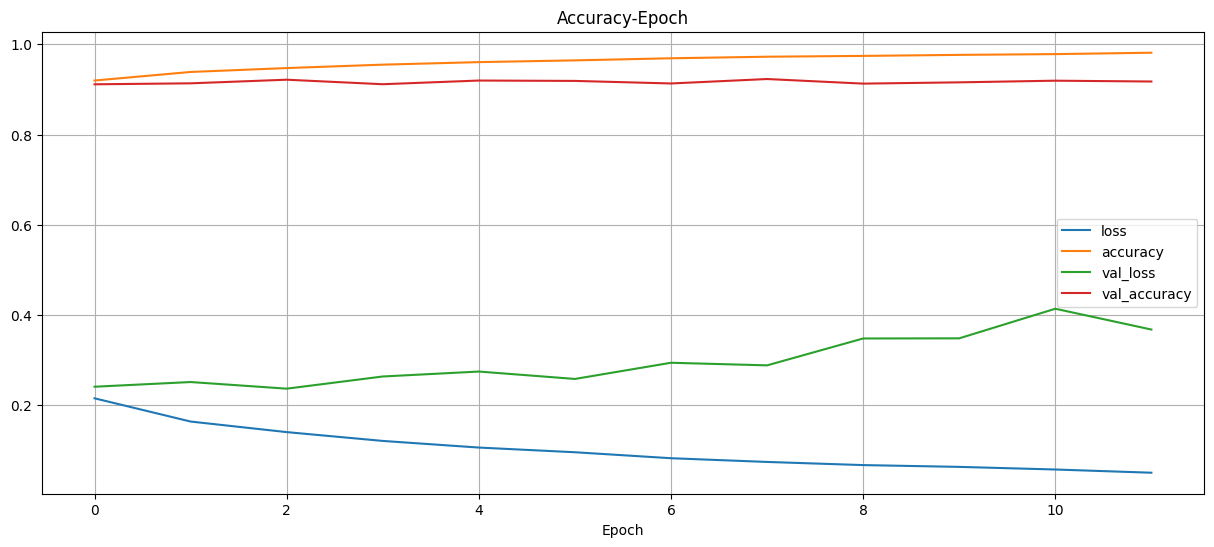

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy-Epoch")
plt.xlabel("Epoch")
plt.grid()

313/313 [==============================] - 26s 82ms/step


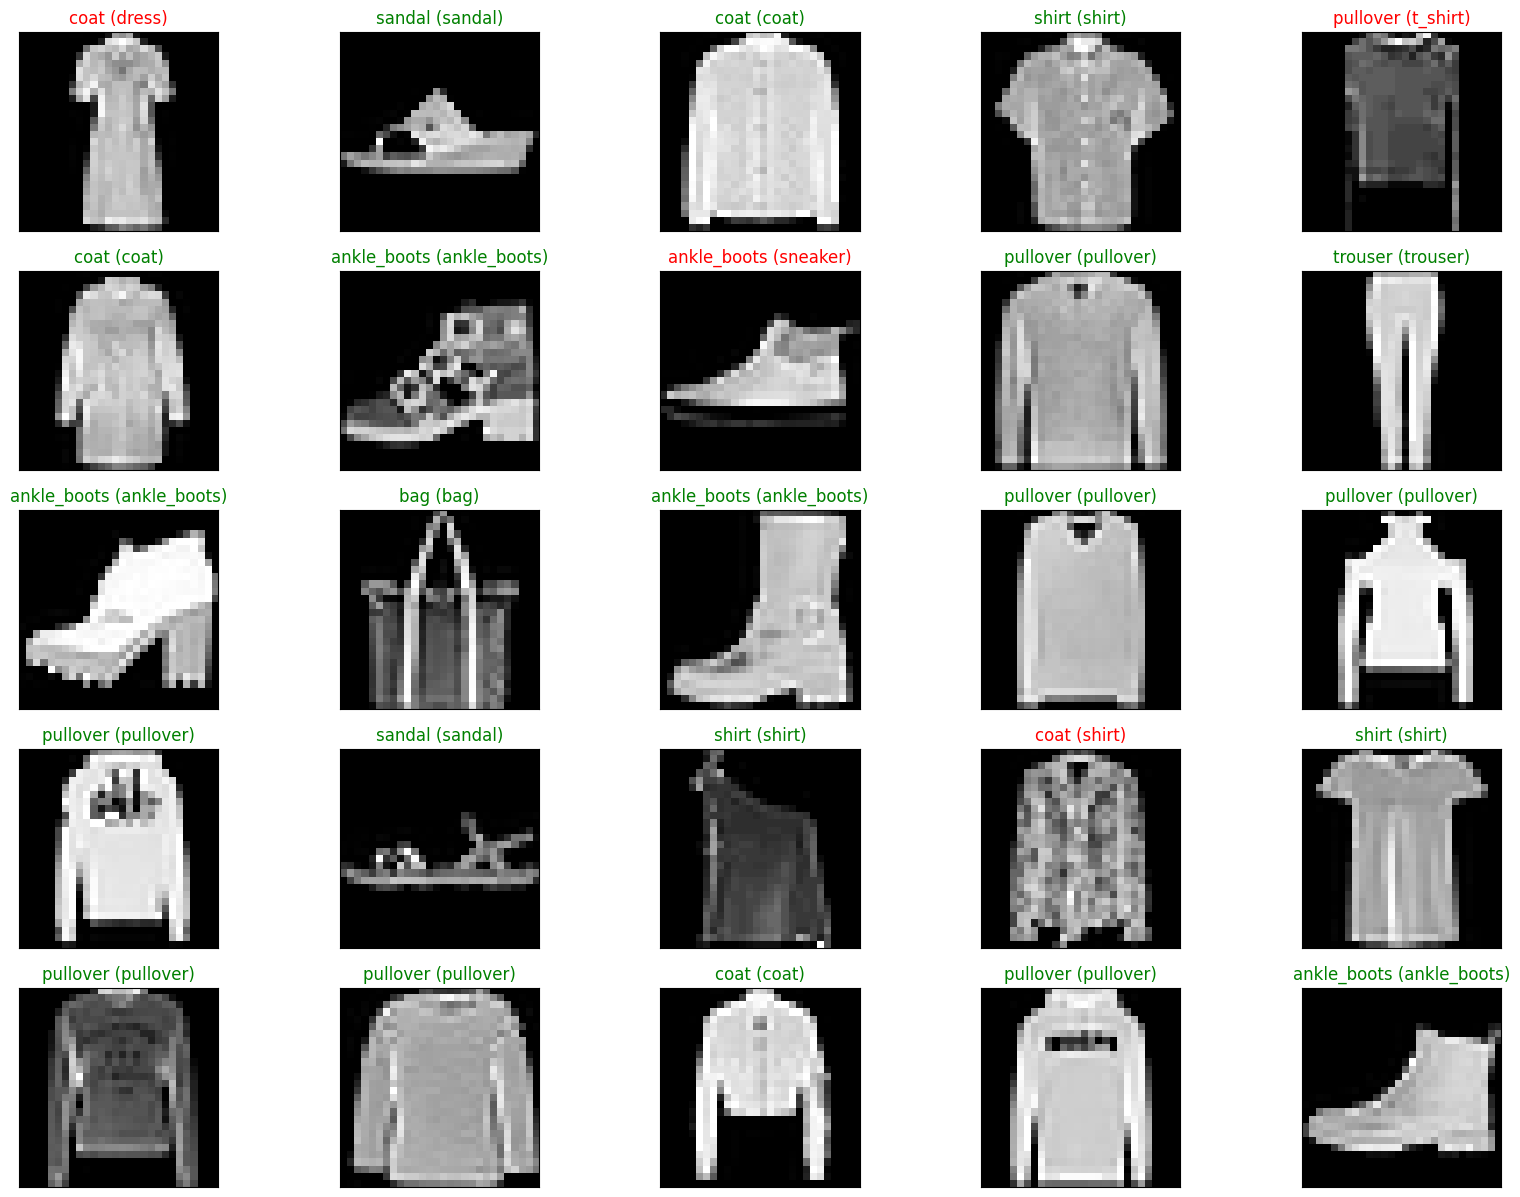

In [30]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_pred = model.predict(X_test)
X_test_ = X_test.reshape(10000, 28, 28)

incorrect = 0
size = 25
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(X_test_.shape[0], size=size, replace=False)):
    ax = figure.add_subplot(int(size / 5), 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test_[index]), cmap='gray')
    predict_index = np.argmax(y_pred[index])
    true_index = y_test[index]

    if predict_index != true_index:
      incorrect += 1

    ax.set_title(f"{labels[predict_index]} ({labels[true_index]})",
                                  color=("green" if predict_index == true_index else "red"))

In [31]:
print(f"incorrect - {incorrect} in {size}")

incorrect - 4 in 25


Збільшення кількості епох зменшує відсоток похибки, але на валідаціній виборці цей показник майже не змінюється. Кокретно для такої архітектури немає сенсу робити більше 5 епох. Дана модель досить добре тренується.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
X_train = tf.image.resize(np.array(X_train)[..., tf.newaxis], (32, 32))
X_train = np.repeat(X_train, 3, axis=-1)
X_test = tf.image.resize(np.array(X_test)[..., tf.newaxis], (32, 32))
X_test = np.repeat(X_test, 3, axis=-1)

X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [5]:
print(X_train.shape, X_test.shape)

(60000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [8]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=5, verbose=1, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 9s 23ms/step - loss: 0.3097 - accuracy: 0.8852 - val_loss: 0.3617 - val_accuracy: 0.8671
Epoch 2/5
375/375 [==============================] - 7s 19ms/step - loss: 0.3011 - accuracy: 0.8888 - val_loss: 0.3532 - val_accuracy: 0.8702
Epoch 3/5
375/375 [==============================] - 8s 22ms/step - loss: 0.2931 - accuracy: 0.8923 - val_loss: 0.3523 - val_accuracy: 0.8712
Epoch 4/5
375/375 [==============================] - 8s 22ms/step - loss: 0.2849 - accuracy: 0.8944 - val_loss: 0.3575 - val_accuracy: 0.8698
Epoch 5/5
375/375 [==============================] - 7s 19ms/step - loss: 0.2792 - accuracy: 0.8965 - val_loss: 0.3478 - val_accuracy: 0.8745


In [13]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3609 - accuracy: 0.8716


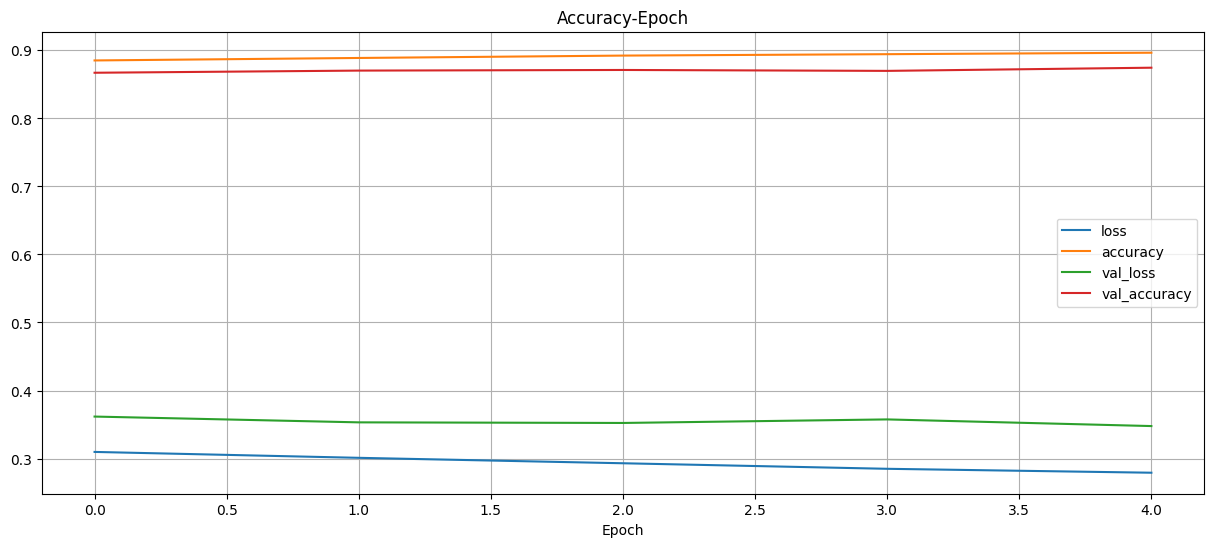

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy-Epoch")
plt.xlabel("Epoch")
plt.grid()

In [15]:
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [19]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=3, verbose=1, batch_size=32, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2341 - accuracy: 0.9159 - val_loss: 0.3368 - val_accuracy: 0.8796
Epoch 2/3
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2321 - accuracy: 0.9169 - val_loss: 0.3368 - val_accuracy: 0.8790
Epoch 3/3
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2304 - accuracy: 0.9165 - val_loss: 0.3363 - val_accuracy: 0.8807


In [21]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, verbose=1, batch_size=256, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 10s 41ms/step - loss: 0.2243 - accuracy: 0.9200 - val_loss: 0.3348 - val_accuracy: 0.8820
Epoch 2/10
188/188 [==============================] - 6s 34ms/step - loss: 0.2228 - accuracy: 0.9207 - val_loss: 0.3329 - val_accuracy: 0.8819
Epoch 3/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2220 - accuracy: 0.9211 - val_loss: 0.3326 - val_accuracy: 0.8824
Epoch 4/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2212 - accuracy: 0.9212 - val_loss: 0.3342 - val_accuracy: 0.8814
Epoch 5/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2209 - accuracy: 0.9222 - val_loss: 0.3336 - val_accuracy: 0.8831
Epoch 6/10
188/188 [==============================] - 6s 34ms/step - loss: 0.2200 - accuracy: 0.9214 - val_loss: 0.3328 - val_accuracy: 0.8820
Epoch 7/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2193 - accuracy: 0.9222 - val_loss: 0.3365 - val_accuracy: 0.880

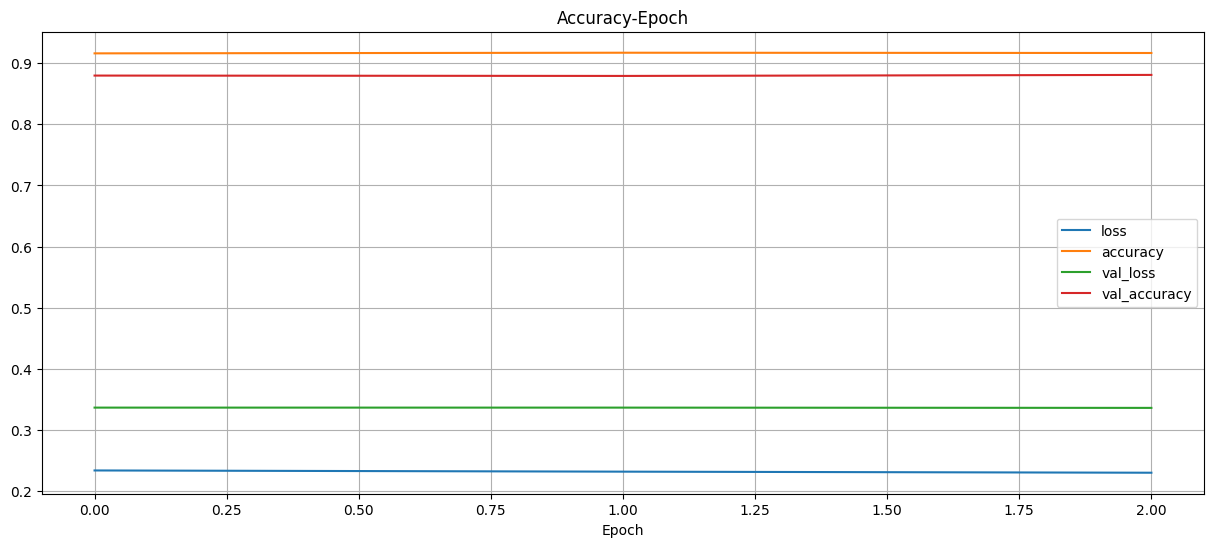

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy-Epoch")
plt.xlabel("Epoch")
plt.grid()

 Звичайна згорткова мережа досить добре себе проявляє при навчанні і можна підібрати оптимальні гіперпарпаметри. Згорткова мережа, яка використовує VGG16 майже не змінює результат роботи від зміни гіперпараметрів і, конкретно в даній задачі, не дуже добре себе проявляє.